# Solves the boundary problem using shooting method

## Aristova XI.9.3

![alt text](task.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
h = 4e-5
x_arr = np.arange(0.0, 1.0, h)

# XI.9.3
def d2y(x, y):
    return x * np.sqrt(y)

def d2u(x, u):
    return x / 2 / np.sqrt(y) * u

def f(x, f0, df):
    f_new = f0 + df(x, f0) * h

    eps = 1e-4
    for i in range(1000):
        if abs(f_new - f0) <= eps:
            return f_new
        f0 = f_new
        f_new = f0 + df(x, f0) * h

    print("\nToo many iterations!")
    return f_new

def calcY(y0, alpha):
    y = y0
    dy = alpha

    ys = []

    for x in x_arr:
        ys.append(y)
        y += dy * h
        dy = f(x, dy, d2y)

    plt.plot(x_arr, ys)

    return ys


alpha = 1.766136241418076, y = 2.0000000008396075


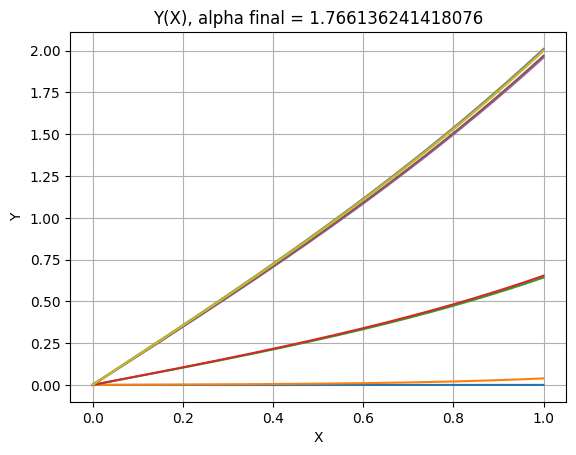

In [10]:
np.set_printoptions(floatmode='maxprec', suppress=True)
y0 = 0
y1 = 2
alpha = 0

h_alpha = 1e-2

eps = 1e-7

y_new = calcY(y0, alpha)
F = y_new[-1] - y1
while abs(F) > eps:
    y_new = calcY(y0, alpha + h_alpha)
    dF = (y_new[-1] - y1 - F) / h_alpha

    alpha = alpha - F/dF

    y_new = calcY(y0, alpha)
    F = y_new[-1] - y1

print(f"alpha = {alpha}, y = {y_new[-1]}")

plt.grid()
plt.xlabel("X")
plt.ylabel("Y")

plt.title(f"Y(X), alpha final = {alpha}")

plt.show()

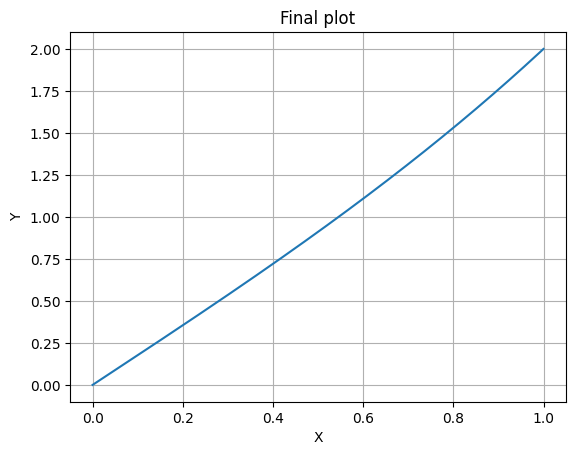

In [14]:
# Final plot

plt.title("Final plot")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_arr, y_new)